<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project3/blob/main/luisa_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
#import sqlalchemy as sql
import datetime

from PIL import Image 

import pickle

# !pip install -q streamlit

In [ ]:
col_list = ['nconst','primaryName','primaryProfession']
name_b = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list)

In [ ]:
col_list2 = ['tconst','nconst']
title_p = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list2)

In [ ]:
top_movies= pd.merge(title_p, name_b, how='inner', on=['nconst', 'nconst'])

In [ ]:
col_list3 = ['tconst','averageRating','numVotes']
title_ratings = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list3)

In [ ]:
top_movies2= pd.merge(top_movies5, title_ratings, how='inner', on=['tconst', 'tconst'])

In [23]:
top_movies['wheighted'] = (top_movies['averageRating']*top_movies['numVotes'])/top_movies['numVotes'].sum()
top_movies.sort_values(by=('wheighted'), ascending=False).head(10)

,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes,wheighted
1200533,tt0111161,nm0555550,Niki Marvin,producer,9.3,2655549,0.000735
1200524,tt0111161,nm0005683,Roger Deakins,cinematographer,9.3,2655549,0.000735
1200533,tt0111161,nm0555550,Niki Marvin,director,9.3,2655549,0.000735
1200532,tt0111161,nm0006669,William Sadler,producer,9.3,2655549,0.000735
1200532,tt0111161,nm0006669,William Sadler,soundtrack,9.3,2655549,0.000735
1200532,tt0111161,nm0006669,William Sadler,actor,9.3,2655549,0.000735
1200531,tt0111161,nm0000209,Tim Robbins,director,9.3,2655549,0.000735
1200531,tt0111161,nm0000209,Tim Robbins,producer,9.3,2655549,0.000735
1200531,tt0111161,nm0000209,Tim Robbins,actor,9.3,2655549,0.000735
1200530,tt0111161,nm0002353,Thomas Newman,soundtrack,9.3,2655549,0.000735


In [ ]:
top_movies24= pd.merge(top_movies2, title_basics, how='inner', on=['tconst', 'tconst'])

In [ ]:
top_movies2["primaryProfession"] = top_movies2.primaryProfession.str.split(',')
top_movies2_split = top_movies2.explode("primaryProfession")

In [3]:
top_movies = pd.read_pickle("/content/topm14.pickle")

In [26]:
top_movies

,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes,wheighted
0,tt0000001,nm1588970,Carmencita,soundtrack,5.7,1921,8.568788e-07
1,tt0000001,nm0005690,William K.L. Dickson,"cinematographer,director,producer",5.7,1921,8.568788e-07
2,tt0000001,nm0374658,William Heise,"cinematographer,director,producer",5.7,1921,8.568788e-07
3,tt0000005,nm0005690,William K.L. Dickson,"cinematographer,director,producer",6.2,2543,1.233830e-06
4,tt0000005,nm0443482,Charles Kayser,actor,6.2,2543,1.233830e-06
...,...,...,...,...,...,...,...
10364921,tt9914342,nm10537168,Adrien Montier,"director,writer",6.2,5,2.425933e-09
10364922,tt9914342,nm10537169,Maryline Peyrichoux,director,6.2,5,2.425933e-09
10364923,tt9914342,nm10537170,Léa Vera Toro,"director,writer",6.2,5,2.425933e-09
10364924,tt9914342,nm10537171,Maryline Perychoux,writer,6.2,5,2.425933e-09


In [28]:
top_movies["primaryProfession"] = top_movies.primaryProfession.str.split(',')
top_movies_split = top_movies.explode("primaryProfession")

KeyboardInterrupt: ignored

In [35]:
top_movies_split.to_pickle('/content/tm.pickle')

In [4]:
top_movies = pd.read_pickle("/content/tm.pickle")

In [39]:
top_movies.head()

,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes,wheighted,titleType
0,tt0000001,nm1588970,Carmencita,soundtrack,5.7,1921,8.568788e-07,short
1,tt0000001,nm0005690,William K.L. Dickson,cinematographer,5.7,1921,8.568788e-07,short
2,tt0000001,nm0005690,William K.L. Dickson,director,5.7,1921,8.568788e-07,short
3,tt0000001,nm0005690,William K.L. Dickson,producer,5.7,1921,8.568788e-07,short
4,tt0000001,nm0374658,William Heise,cinematographer,5.7,1921,8.568788e-07,short


In [5]:
col_list5 = ['tconst','titleType']
title_basics = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list5)

In [6]:
top_movies27= pd.merge(top_movies, title_basics, how='inner', on=['tconst', 'tconst'])

In [7]:
top_movies27.to_pickle('/content/tm3.pickle')

In [8]:
top_movies = pd.read_pickle("/content/tm3.pickle")

In [9]:
top_movies.head()

,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes,wheighted,titleType
0,tt0000001,nm1588970,Carmencita,soundtrack,5.7,1921,8.568788e-07,short
1,tt0000001,nm0005690,William K.L. Dickson,cinematographer,5.7,1921,8.568788e-07,short
2,tt0000001,nm0005690,William K.L. Dickson,director,5.7,1921,8.568788e-07,short
3,tt0000001,nm0005690,William K.L. Dickson,producer,5.7,1921,8.568788e-07,short
4,tt0000001,nm0374658,William Heise,cinematographer,5.7,1921,8.568788e-07,short


In [ ]:
condition_ms = title_basics.loc[((title_basics['titleType'] == 'movie') | (title_basics['titleType'] =='short')) & (title_basics['startYear'] <= '2022')]

In [14]:
condition = top_movies['primaryProfession'] == 'actor'

actors = top_movies[condition][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType']]

condition2 = top_movies['titleType'] == 'movie'
condition3 = top_movies['titleType'] == 'short'
actors_ms = actors[condition2 | condition3 ][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [16]:
actors_ms['titleType'].value_counts()

movie    901614
short    309597
Name: titleType, dtype: int64

In [11]:
actors["averageRating"].mean()


6.915578399448448

In [17]:
condition2 = actors_ms['wheighted'] > actors_ms["wheighted"].mean()

t_actors = actors_ms[condition2][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType']]

In [18]:
actorst = t_actors.groupby('primaryName')['tconst'].count().reset_index(name='count_actors_movie') 
tp = actorst.sort_values(by=('count_actors_movie'), ascending=False)

top = actorst.sort_values(by=('count_actors_movie'), ascending=False).head(10)

[Text(0, 0.5, 'Actors'), Text(0.5, 0, 'Nº movies')]

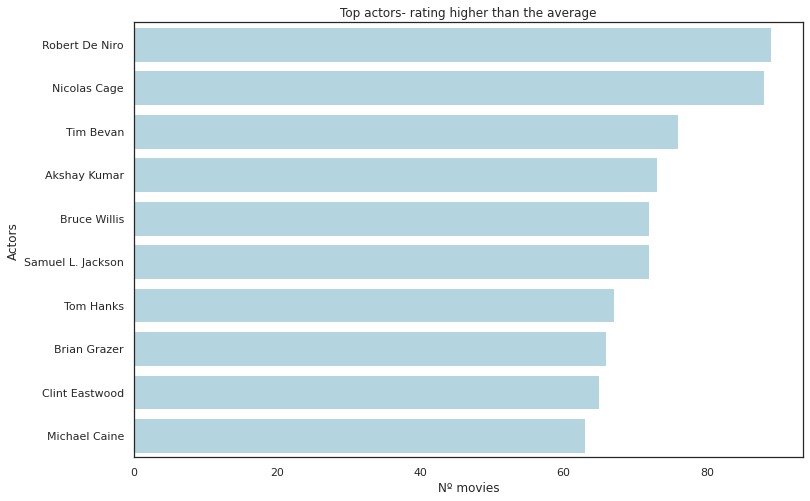

In [19]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")
ax = sns.barplot(data=top, y="primaryName", x="count_actors_movie", color ='lightblue')
ax.set(title = 'Top actors- rating higher than the average')
ax.set(xlabel='Nº movies', ylabel='Actors')

# ax = sns.barplot(data=top, y="primaryName", x="count_actors_movie",color="seagreen")

In [20]:
top 

,primaryName,count_actors_movie
19440,Robert De Niro,89
16844,Nicolas Cage,88
22522,Tim Bevan,76
473,Akshay Kumar,73
3196,Bruce Willis,72
20411,Samuel L. Jackson,72
22769,Tom Hanks,67
3056,Brian Grazer,66
4396,Clint Eastwood,65
15500,Michael Caine,63


In [21]:
actor = str(input("Choose an actor "))
result=tp.loc[tp['primaryName'] == actor, 'count_actors_movie']
if result.empty:
  print("actor is not on the list")
else:
  print(result)

Choose an actor Brian Grazer
3056    66
Name: count_actors_movie, dtype: int64


In [25]:
condition = top_movies['primaryProfession'] == 'actress'
actress= top_movies[condition][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType']]

In [34]:
actress['titleType'].value_counts()

tvEpisode       916585
movie           436230
tvSeries        223142
short           153077
video            99955
tvMovie          73803
tvMiniSeries     35164
tvSpecial        14030
videoGame        12266
tvShort           2976
Name: titleType, dtype: int64

In [26]:
condition2 = top_movies['titleType'] == 'movie'
condition3 = top_movies['titleType'] == 'short'
actress_ms = actress[condition2 | condition3 ][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
actress_ms['titleType'].value_counts()

movie    436230
short    153077
Name: titleType, dtype: int64

In [30]:
condition4 = actress_ms['wheighted'] > actress_ms["wheighted"].mean()

actress_ms = actress[condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType']]

actress_t = actress_m.groupby('primaryName')['tconst'].count().reset_index(name='count_actress_movie') 

top_w = actress_t.sort_values(by=('count_actress_movie'), ascending=False).head(10)
top_w

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


IndexingError: ignored

In [22]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")
ax2 = sns.barplot(data=top_w, y="primaryName", x="count_actress_movie",color ='lightblue)
ax2.set(title = 'Top actress- rating higher than the average')
ax2.set(xlabel='Nº movies', ylabel='Actress')


NameError: ignored

In [91]:
condition4 = top_movies['primaryProfession'] == 'producer'
producer = top_movies[condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

In [92]:
condition4 = producer['wheighted''] > producer["wheighted'"].mean()
t_producer = producer[condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

In [93]:
top_p = t_producer.groupby('primaryName')['tconst'].count().reset_index(name='count_producer_movie') 

top_p = top_p.sort_values(by=('count_producer_movie'), ascending=False).head(10)


[Text(0, 0.5, 'Producer'), Text(0.5, 0, 'Nº movies')]

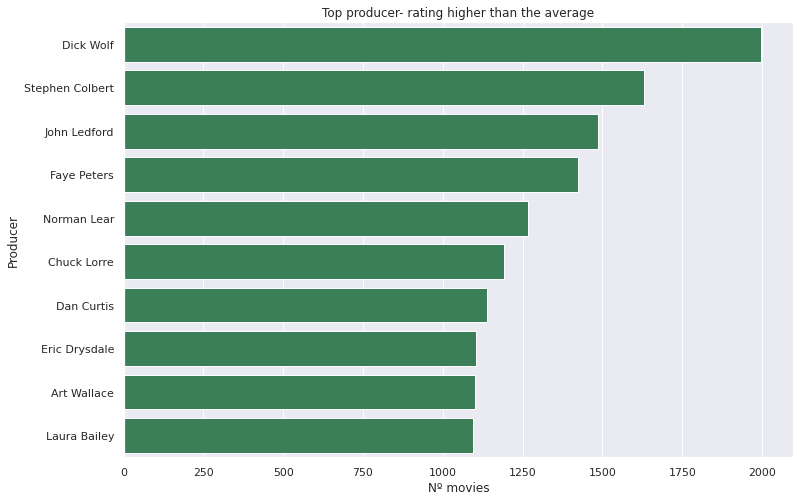

In [94]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")
ax3 = sns.barplot(data=top_p, y="primaryName", x="count_producer_movie",color ='lightblue)
ax3.set(title = 'Top producer- rating higher than the average')
ax3.set(xlabel='Nº movies', ylabel='Producer')

In [95]:
condition = top_movies['primaryProfession'] == 'director'
director = top_movies[condition][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]
director['primaryProfession'].value_counts()

director    2265398
Name: primaryProfession, dtype: int64

In [96]:
condition6 = director['wheighted''] > director["wheighted'"].mean()
t_director = director[condition6][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

In [97]:
director_t = t_director.groupby('primaryName')['tconst'].count().reset_index(name='count_director_movie') 

top_d = director_t.sort_values(by=('count_director_movie'), ascending=False).head(10)
top_d

,primaryName,count_director_movie
49563,Eric Drysdale,1226
35332,Dan Curtis,1183
44300,Donald P. Bellisario,1053
27832,Charles Marquis Warren,1037
72943,James Rolfe,855
176200,William Hanna,854
85694,Joseph Barbera,842
72292,James Burrows,836
60851,Greg Berlanti,835
31526,Chuck O'Neil,831


[Text(0, 0.5, 'Director'), Text(0.5, 0, 'Nº movies')]

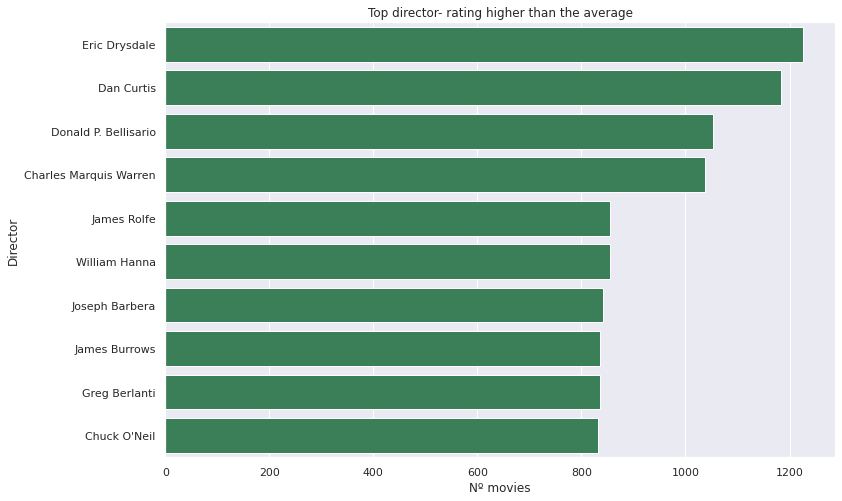

In [98]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")
ax2 = sns.barplot(data=top_d, y="primaryName", x="count_director_movie",color ='lightblue)
ax2.set(title = 'Top director- rating higher than the average')
ax2.set(xlabel='Nº movies', ylabel='Director')